# Violin Plots 101: : Visualizing Distributions and Probability Densities

In [2]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Violin plots** shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

When comparing datasets, it is important to consider how we are scaling the individual KDE curves. We do not have a separate axis to map the actual density curves.

##  1.0 Cars Fuel consumption dataset

The [mtcars dataset](#https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

In [67]:
cars = pd.read_csv(os.path.join(os.getcwd(), 'input', 'mtcars.csv'))
cars.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 2.0 How to scale violin plots for comparisons?

Instead of starting with the basics first, I wanted to point out an important detail that greatly affects the plots' shapes and is often overlooked during EDA. 

That is how we choose to scale the individual KDE curves. With violin plots, we do not have a separate axis to map the actual density curves. What I mean by that is that we have the categorical variable on the x-axis and the quantitative variable on the y-axis. 

Each violin is just a reflected density plot, and there is no other axis where to plot the density values. Their heights are relative to each other, and we are choosing how to relate them:

* **Equal Areas:** Each violin will have the same area of 1.0 satisfying the definition of a PDF.
* **Equal Widths:** Each violin will have the same width. Good for comparing shape.
* **Count:** The width of the violins will be scaled by the number of observations in that bin.

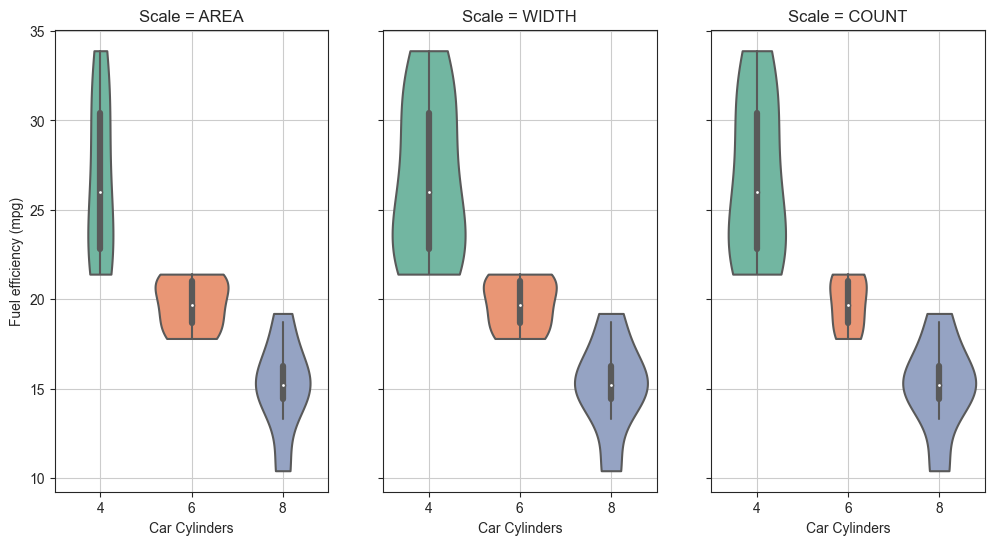

In [98]:
sns.set_style("ticks")

def plot_violin(scale, ax):
    ax = sns.violinplot(data = cars, x = "cyl", y = 'mpg', 
                        palette = 'Set2', ax = ax, cut=0, scale = scale)
    ax.set_ylabel('')
    ax.set_xlabel('Car Cylinders')
    ax.set_title('Scale = ' + scale.upper())
    ax.grid()
    return ax

fig, ax = plt.subplots(1, 3, figsize = (12,6), sharey = True)   
for ax_i, scale in zip(ax.flatten(), ['area', 'width', 'count']):
    plot_violin(scale, ax_i,)

ax[0].set_ylabel('Fuel efficiency (mpg)');

## Basic violin plot

#### Data: Perceptions of Probability and Numbers

The raw data comes from responses to the following question: 

*What* ***probability or number*** *would you assign to the phrase* ***phrase*** *?*

In [28]:
df = pd.read_csv(os.path.join(os.getcwd(), 'input', 'people_perception.csv'))
df = pd.melt(df, var_name='phrase', value_name='probability')
df.sample(5).reset_index(drop = True)

,phrase,probability
0,Likely,65.0
1,Better Than Even,60.0
2,Almost Certainly,98.0
3,Unlikely,30.0
4,Almost No Chance,1.0


Get a subset of the 

In [29]:
columns_subset = ['Almost Certainly', 'Highly Likely', 'Probable', 'Likely','Very Good Chance']
df = df.loc[df['phrase'].isin(columns_subset)]

#  Upon inspection there was a clear outlier for 'Highly Likely'
idxmin = df.loc[df['phrase'] == 'Highly Likely', 'probability'].idxmin()
df.drop(idxmin, axis = 0, inplace = True)

order = list(df.groupby('phrase').mean().sort_values(by='probability').index)

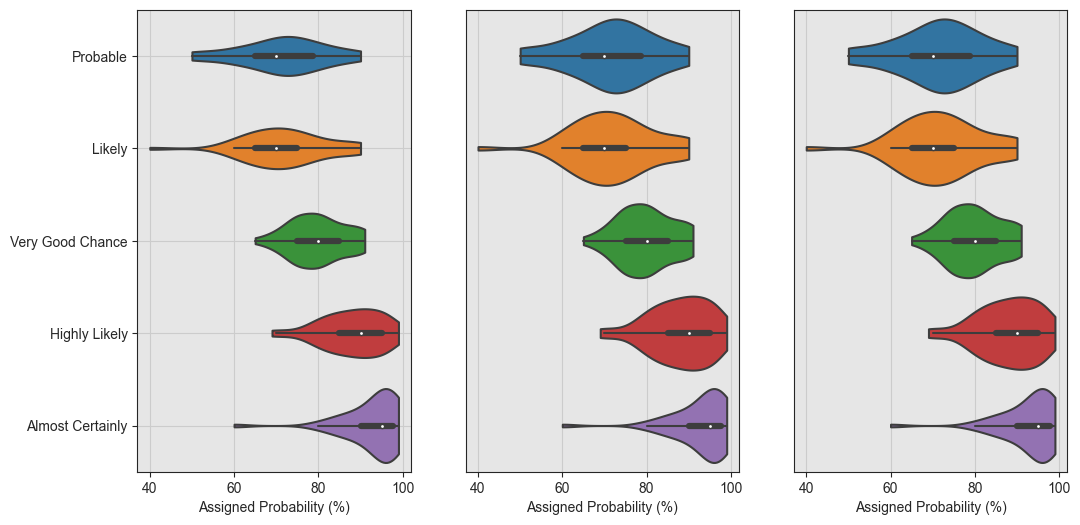

In [52]:
sns.set_style("ticks", {"axes.facecolor": ".9"})

def plot_violin(scale, ax):
    ax = sns.violinplot(df, x = 'probability', y = 'phrase', cut = 0. , inner = 'box', scale = scale, ax= ax,
                        order = list(df.groupby('phrase').mean().sort_values(by='probability').index))
    ax.set_ylabel('')
    ax.set_xlabel('Assigned Probability (%)')
    ax.grid()
    ax.get_yaxis().set_visible(False)
    return ax

fig, ax = plt.subplots(1, 3, figsize = (12,6))   
for ax_i, scale in zip(ax.flatten(), ['area', 'width', 'count']):
    plot_violin(scale, ax_i)
    
ax[0].get_yaxis().set_visible(True)
# ax = sns.violinplot(df, x = 'probability', y = 'phrase', cut = 0. , inner = 'box', scale = 'area')
# ax.set_xlabel('Assigned Probability (%)')
# ax.set_ylabel('')
# ax.grid()